# $\chi^2$ fitting/minimisation:

Given the functional form:

$r(p) = \frac{y_i - f(x_i,p)}{\sigma_i}$

where $y_i$ are the data points and $f(x_i,p)$ is the model.


$\chi^2$ minimisation requires you to minimise it so that we find the best value of $p$:

$\min \sum_1^N (r(p))^2$

The advantage of this method is that you can include the uncertainties in $y_i$.

### Example: Pendulum

In [1]:
# Improting libraries
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define filename

filename = "./sample_data/data_pendulum.csv"

# Open the data frame
df_2 = pd.read_csv(filename)

#print(data_pendulum)

# Get data series from our data frame
length  = np.array(df_2["Length(m)"])
period1 = df_2["Period1(s)"]
period2 = df_2["Period2(s)"]
period3 = df_2["Period3(s)"]
period4 = df_2["Period4(s)"]
period5 = df_2["Period5(s)"]

In [3]:
# Empty lists to receive the average values

mean_p = []
stdv_p = []

for i in range(len(df_2["Period1(s)"])):
    #print(i)
    mean_p.append(np.mean(np.array(df_2.iloc[i][1:])))
    stdv_p.append(np.std(np.array(df_2.iloc[i][1:])))

mean_p = np.array(mean_p) # average values
stdv_p = np.array(stdv_p) # uncertainties

#print(mean_p)
#print(stdv_p)

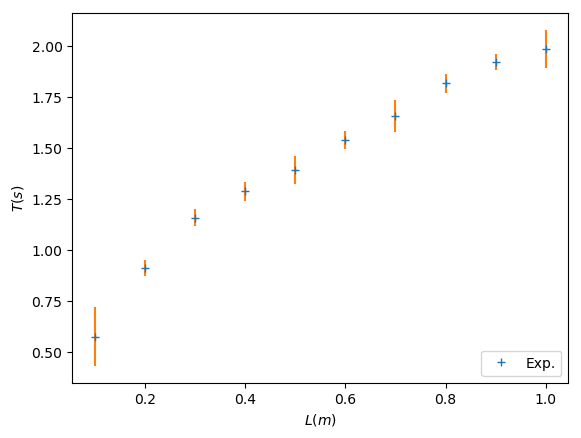

In [4]:
# Plot of the data

fig, ax = plt.subplots()

ax.plot(length, mean_p, linestyle = " ", marker = "+", label = "Exp.")
#ax.plot(length, mean_pfit, linestyle = "-", color = "brown"\
       #, label = "Best Fit")
ax.errorbar(length, mean_p, yerr = 3*stdv_p, linestyle = " ")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend(loc = 4)

plt.show()

### $\chi^2$ function

Fitting model:

$$T = 2\pi\sqrt{\frac{L}{g}}$$

$$T = \frac{2\pi}{\sqrt{g}}\sqrt{L}$$

$$T = \beta\sqrt{L}$$


In [5]:
# Define chi^2

def chi_sqr_function(beta):
    """
    This function allows us to return the chi_sqr statistic.
    It compares our experimental data with a model based on physics.
    Input:  beta 
    Output: chi_sqr stastistic
    """
    model  = beta*np.sqrt(length)
    
    chisqr = np.sum((mean_p - model)**2/(stdv_p)**2) 
    
    return chisqr

### Optimisation routine to minimise our $\chi^2$ function:

We will use minimize from scipy.optimize:

We can use opt.minimize from the scipy package.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


This function minimises a scalar function of one or more variables.


The optimization result is represented as a OptimizeResult object with attributes:


- **x** the solution array
- **success** a Boolean flag indicating if the optimizer exited successfully
- **a message** which describes the cause of the termination.




In [6]:
# Define our ansatsz:
x_0 = np.array((0))

# Call the minimization routine
result_object = opt.minimize(chi_sqr_function, x_0)

# Print Result Object:
print(result_object.x)

[2.02196011]


In [7]:
# Call chi_sqr statistic out best-fit beta value:

chi_sqr_statistic = chi_sqr_function(result_object.x)

print("chi^2 value: ", chi_sqr_statistic)

chi^2 value:  25.982956559764887


In [8]:
# Evaluate our model for the data using the result

beta_fit = result_object.x
mean_p_fit  = beta_fit*np.sqrt(length)

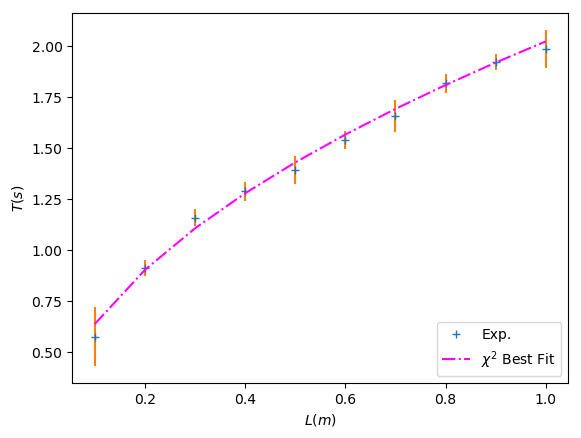

In [9]:
# Plotting

# Plot of the data

fig, ax = plt.subplots()

ax.plot(length, mean_p, linestyle = " ", marker = "+", label = "Exp.")
ax.plot(length, mean_p_fit, linestyle = "-.", color = "magenta"\
       , label = r"$\chi^2$ Best Fit")
ax.errorbar(length, mean_p, yerr = 3*stdv_p, linestyle = " ")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend(loc = 4)

plt.show()

### Compare to LM method (see problem 105)

In [10]:
# Define new fitting model

def fit_sqrt(x_values, beta):
    """
    Parabolic function with 1 free parameter (beta)
    Inputs: x_values are time values, beta = free param.
    Output: y_values are distance values
    """
    y_values = beta*np.sqrt(x_values)
    
    return y_values

In [11]:
# Call the curve_fit function
coef3, cova3 = opt.curve_fit(fit_sqrt, length, mean_p)

print("beta is = ", coef3[0])

beta is =  2.006513337645759


In [12]:
# Use the result to define the new fitted Y values

mean_p_fit_lm = fit_sqrt(length, *coef3)

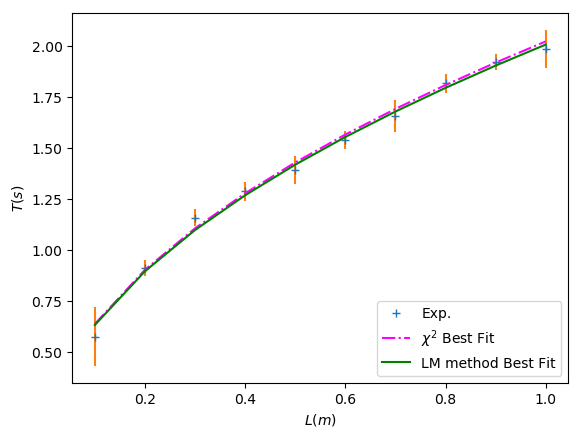

In [13]:
# Comparison Plotting

# Plot of the data

fig, ax = plt.subplots()

ax.plot(length, mean_p, linestyle = " ", marker = "+", label = "Exp.")
ax.plot(length, mean_p_fit, linestyle = "-.", color = "magenta"\
       , label = r"$\chi^2$ Best Fit")
ax.plot(length, mean_p_fit_lm, linestyle = "-", color = "green"\
       , label = r"LM method Best Fit")
ax.errorbar(length, mean_p, yerr = 3*stdv_p, linestyle = " ")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend(loc = 4)

plt.show()

## Example:  spectral fitting via $\chi^2$:

We are going to generate a noisy synthetic spectrum and use $\chi^2$ minimisation to find the best-fit model.

#### 1. Synthetic spectrum:

Gaussian profile:

$$g(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2} \right).$$

In [16]:
# Let's generate a Gaussian profile

def gaussian_function(x_values, mu, sigma):
    """
    This generates a 1D Gaussian profile.
    Inputs: x vector, mu= mean, sigma= stdv
    Output: y_vector with the Gaussian
    """

    factor = 1/(sigma*np.sqrt(2.*np.pi))
    
    y_values = factor*np.exp(-0.5*(x_values - mu)**2/(sigma**2))
    
    return y_values

In [17]:
# n points
n_points = 100

# Frequency vector
nu = np.linspace(0., 10., n_points)

In [38]:
# Call our Gaussian function

mu_0 = 5.0
sigma_0 = 0.5

g_no_noise = gaussian_function(nu, mu_0, sigma_0)

# Let's add noise
# Fix the seed for the random number generator

np.random.seed(1428)

# Noise vector to be added to our Gaussian
noise = np.random.normal(0., 1., size = (n_points,))

print(noise.shape)

# Let's add the noise
g_with_noise = g_no_noise + 0.1*noise


# Let's define a baseline
baseline = 0.2

# Final spectrum

g_final = g_with_noise + baseline

(100,)


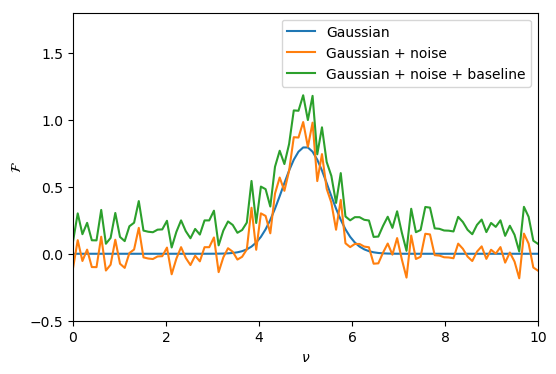

In [46]:
# Plotting top check

plt.figure(figsize=(6,4))

plt.plot(nu, g_no_noise, label = "Gaussian")
plt.plot(nu, g_with_noise, label = "Gaussian + noise")
plt.plot(nu, g_final, label = "Gaussian + noise + baseline")

plt.xlabel(r"$\nu$")
plt.ylabel(r"${\cal F}$")

plt.xlim(0,10)
plt.ylim(-0.5,1.8)

plt.legend()

plt.show()

#### 2. Error bars

In [53]:
# Random error bars

errors = np.random.normal(0., 0.2, size = (n_points,))


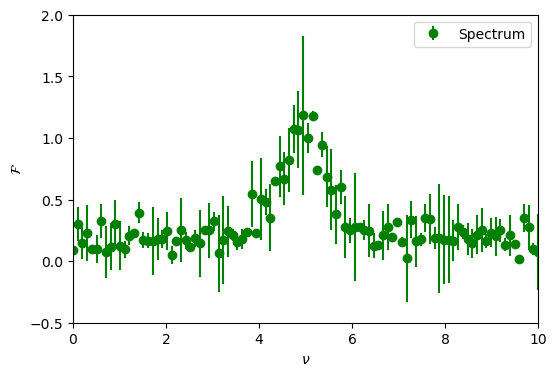

In [61]:
# Plotting with error bars

plt.figure(figsize=(6,4))

#plt.plot(nu, g_final, color = "green", label = "Gaussian + noise + baseline")
plt.errorbar(nu, g_final, errors, color = "green",\
             fmt = "o", label = "Spectrum")

plt.xlabel(r"$\nu$")
plt.ylabel(r"${\cal F}$")

plt.xlim(0,10)
plt.ylim(-0.5,2.0)

plt.legend()

plt.show()